In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

# The Uniform Distribution

## Objectives

+ To practice with the uniform distribution.

## The uniform distribution

The uniform distribution is the most common continuous distribution.
It corresponds to a random variable that is equally likely to take a value within a given interval.
We write:

$$
X\sim U([0,1]),
$$

and we read $X$ follows a uniform distribution taking values in $[0,1]$.

The probability density of the uniform is constant in $[0,1]$ and zero outside it.
We have:

$$
p(x) := U(x|[0,1]) := \begin{cases}
1,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

The cumulative distribution funciton of the uniform is for $x in [0,1]$:

$$
F(x) = p(X \le x) = \int_0^x p(u) du = \int_0^x du = x.
$$

Obviously, we have $F(x) = 0$ for $x < 0$ and $F(x) = 1$ for $x > 1$.

The probability that $X$ takes values in $[a,b]$ for $a < b$ in $[0,1]$ is:

$$
p(a \le X \le b) = F(b) - F(a) = b - a.
$$

The expectation of the uniform is:

$$
\mathbb{E}[X] = \int_0^1 xdx = \frac{1}{2}.
$$

The variance of the uniform is:

$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \left(\mathbb{E}[X]\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$

Let's create a uniform random variable using scipy:

In [2]:
import scipy.stats as st
X = st.uniform()

Let's plot the PDF:

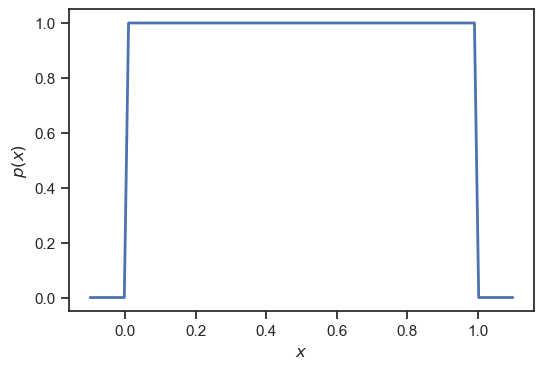

In [3]:
fig, ax = plt.subplots()
xs = np.linspace(-0.1, 1.1, 100)
ax.plot(xs, X.pdf(xs), lw=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

Now the CDF:

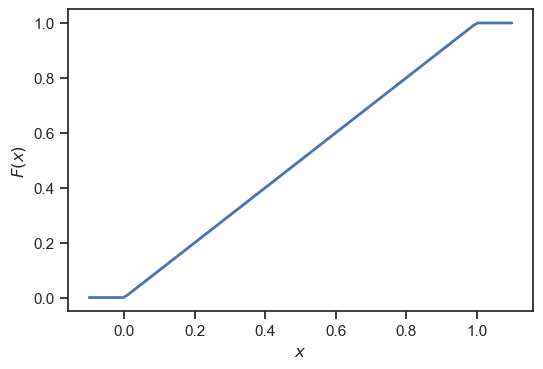

In [4]:
fig, ax = plt.subplots()
ax.plot(xs, X.cdf(xs), lw=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$");

The expectation is:

In [5]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 0.50


The variance:

In [6]:
# The variance is:
print(f"V[X] = {X.var():.2f}")

V[X] = 0.08


Here is how you can sample from the uniform one hundred times:

In [7]:
X.rvs(size=100)

array([0.66879238, 0.75736348, 0.7812501 , 0.27933322, 0.56074956,
       0.22117569, 0.13367789, 0.08781332, 0.92979958, 0.23459637,
       0.92809888, 0.5814472 , 0.26280797, 0.9108148 , 0.50478432,
       0.6190595 , 0.40672951, 0.17830193, 0.82812523, 0.08030685,
       0.73094922, 0.57757433, 0.30082494, 0.34891424, 0.42321286,
       0.73301765, 0.97325906, 0.85121544, 0.79344264, 0.43710437,
       0.47301335, 0.32680782, 0.32762497, 0.79189128, 0.4932426 ,
       0.39353935, 0.73214114, 0.51196885, 0.82466441, 0.96251777,
       0.57712978, 0.16213913, 0.96023262, 0.8256694 , 0.60125674,
       0.95639564, 0.1813989 , 0.1370642 , 0.72564754, 0.85959444,
       0.74086014, 0.72892095, 0.10661595, 0.48914761, 0.64530463,
       0.78829441, 0.67443356, 0.61846556, 0.87410386, 0.13069682,
       0.73299368, 0.72562731, 0.95585603, 0.58951981, 0.41871065,
       0.25931519, 0.38000015, 0.5878755 , 0.6890931 , 0.14515412,
       0.13497739, 0.30664024, 0.7905363 , 0.48192938, 0.34733

An alternative way is to use the functionality of numpy:

In [8]:
np.random.rand(100)

array([0.29279788, 0.4337704 , 0.93829631, 0.70369052, 0.8588247 ,
       0.08551964, 0.13681101, 0.53497048, 0.73944118, 0.76798519,
       0.14274447, 0.58691282, 0.27223556, 0.38984886, 0.86537729,
       0.00271175, 0.97873385, 0.37150024, 0.03565874, 0.51056284,
       0.41651455, 0.13996376, 0.71905168, 0.55034888, 0.04843597,
       0.73228376, 0.63664816, 0.13718881, 0.61372497, 0.28604202,
       0.07053062, 0.56984752, 0.9935996 , 0.94679784, 0.41333832,
       0.21864241, 0.89530563, 0.26852291, 0.33993037, 0.99379449,
       0.52043625, 0.69054632, 0.94599312, 0.39209509, 0.15515099,
       0.11913377, 0.36727144, 0.16305775, 0.32788912, 0.93186119,
       0.94213692, 0.38479948, 0.79121509, 0.28130922, 0.61572918,
       0.19639303, 0.23152655, 0.46311709, 0.25954506, 0.37761004,
       0.2387859 , 0.58126836, 0.39016289, 0.87688937, 0.28628025,
       0.09591198, 0.92969956, 0.93099493, 0.15935987, 0.59326533,
       0.28115257, 0.59453267, 0.7654102 , 0.78502993, 0.13140

Finally, let's find the probability that X is between two numbers.
In particular, we will find $p(-1 \le X \le 0.3)$:

In [9]:
a = -1.0
b = 0.3
prob_X_is_in_ab = X.cdf(b) - X.cdf(a)
print(f"p({a:.2f} <= X <= {b:.2f}) = {prob_X_is_in_ab:.2f}")

p(-1.00 <= X <= 0.30) = 0.30


## The uniform distribution over an arbitrary interval $[a, b]$

The uniform distribution can also be defined over an arbitrary interval $[a,b]$.
We write:

$$
X \sim U([a, b]).
$$

The PDF of this random variable is:

$$
p(x) = \begin{cases}
c,&\;x\in[a,b],\\
0,&\;\text{otherwise},
\end{cases}
$$

where $c$ is a positive constant.
This simply tells us that the probability density of finding $X$ in $[a,b]$ is something positive and that the probability density of findinig outside is exactly zero.
The positive constant $c$ is determined by imposing the normalization condition:

$$
\int_{-\infty}^{+\infty}p(x)dx = 1.
$$

This gives:

$$
1 = \int_{-\infty}^{+\infty}p(x)dx = \int_a^bc dx = c \int_a^bdx = c (b-a).
$$

From this we get:

$$
c = \frac{1}{b - a},
$$

and we can now write:

$$
p(x) = \begin{cases}
\frac{1}{b-a},&x \in [a, b],\\
0,&\;\text{otherwise},
\end{cases}
$$

From the PDF, we can now find the CDF for $x \in [a,b]$:

$$
F(x) = p(X\le x) = \int_{-\infty}^x p(u)du = \int_a^x \frac{1}{b-a}du = \frac{1}{b-a}\int_a^xdu = \frac{x-a}{b-a}.
$$

The expectation is:

$$
\mathbb{E}[X] = \frac{1}{2}(a+b),
$$

and the variance is:

$$
\mathbb{V}[X] = \frac{1}{12}(b-a)^2.
$$

This is how you can do this using ``scipy.stats`` for $a=-2$ and $b=5$:

In [10]:
a = -2.0
b = 5.0
X = st.uniform(loc=a, scale=(b-a))

The PDF is:

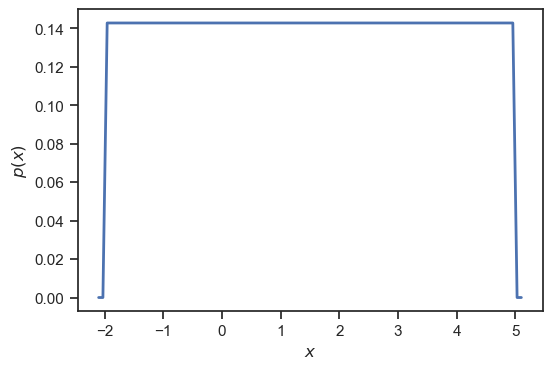

In [11]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(xs, X.pdf(xs), lw=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

The CDF is:

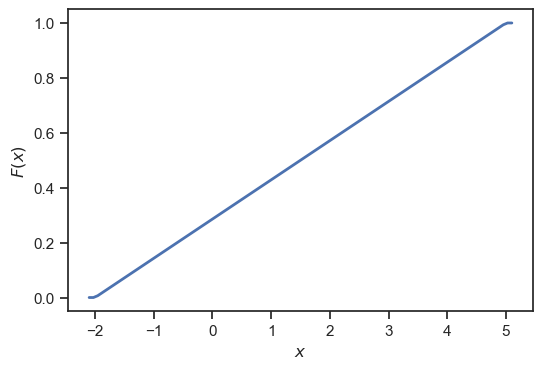

In [12]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(xs, X.cdf(xs), lw=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$");

The expectation is:

In [13]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 1.50


And the variance:

In [14]:
# The variance is:
print(f"V[X] = {X.var():.2f}")

V[X] = 4.08


And here are a few random samples:

In [15]:
X.rvs(size=100)

array([-1.45270321,  3.75427557,  3.40194509,  3.82358559,  0.03669189,
        1.43871971,  4.88467637,  3.44841689,  0.42726523,  2.89913466,
        0.85346694,  2.92994211,  3.14694184,  2.01940974, -1.72196249,
        3.82110494,  2.39971611,  1.42718044, -0.90717363,  2.96824853,
        3.70726804, -0.01298326, -0.75734356,  2.54421778,  1.91741186,
       -1.16488972,  4.94482528, -0.17088186, -0.50243453,  1.40639053,
       -1.70192443,  0.42499389,  0.3012409 ,  3.76880934,  2.76757534,
        4.24870146,  3.73095241,  0.17390123,  4.53686561,  4.73901669,
        0.74036288,  0.61196484,  0.612601  , -1.63111776,  0.78341418,
        4.9549641 ,  1.80276436,  2.01231155, -0.20889983, -1.021387  ,
        0.47748887,  4.16589221,  0.69374002,  3.90882291, -1.9144582 ,
        2.14138314, -0.28114618,  4.92789125,  4.91344386, -0.23949328,
        3.41058834,  0.54531666,  3.66371658,  4.82879482,  4.95741444,
       -0.23216379,  3.76404766,  2.53737447,  2.39744778,  4.39

## Alternative way to get $U([a,b])$

There is another way to obtain samples from $U([a,b])$ that uses only samples from $U([0,1])$.
Here is how. Let $Z$ be a standard uniform random variable:

$$
Z\sim U([0,1]).
$$

Then define the random variable:

$$
X = a + (b-a) Z.
$$

Then, $X\sim U([a,b])$. Why? Well, let's just show that the CDF of $X$ has the right form:

$$
p(X \le x) = p(a + (b-a)Z \le x) = p((b-a)Z \le x - a) = p\left(Z \le \frac{x-a}{b-a}\right) = \frac{x-a}{b-a},
$$

where the last step follows from the fact that the CDF of $Z$ is simply: $p(Z \le z) = z$.
Equipped with this result, we see that we can sample $X$ by sampling $Z$ and then scaling it appropriately (by the way this is what ``scipy.stats`` is doing internally). Here it is using ``numpy.random.rand`` to sample in $[0,1]$:

In [16]:
x_samples = a + (b - a) * np.random.rand(1000)
print(x_samples)

[ 4.54012805  0.63093735  0.90144289  0.05800096  1.62693978  3.00228583
  2.49185347  3.46022424  3.17169053  2.81803692  1.41188949  3.9113902
  2.45299521  2.70474767  2.72780705  4.17581858  1.79614172  3.77161182
  0.98587008  1.02207083  2.50454716  2.30094021  0.35108196  4.87606038
 -0.39959862 -0.03394866  3.41444689  2.13816798  1.70894267  3.73298258
  3.55803823  0.74474686  0.0094886   1.73812834  3.32123959  1.07621825
  1.42369461 -1.08534156 -1.01895819  0.88108717  2.90410362 -1.15288838
  3.7235189   2.95665859  1.43415829  4.67755695  2.47122731  4.27130164
  1.90232171  0.97640793  2.9878023   0.38856739  2.42497378  4.76409813
  0.37391265 -0.75895861  1.5330697   0.95776467 -1.82795386  2.27768227
  3.60435931 -1.29115986  0.16143348 -1.60982776 -1.89311832  1.72326649
 -1.89257755 -0.62824376  0.97827286  1.09663399  1.67463107  1.14842597
 -0.59675701 -0.69488226  2.08472798 -1.37617122  0.97509488 -0.78447101
 -1.66418163 -1.30692186  3.52315738  2.13932916  1.

Let's also do the histogram of x_samples to make sure they are distributed the right way:

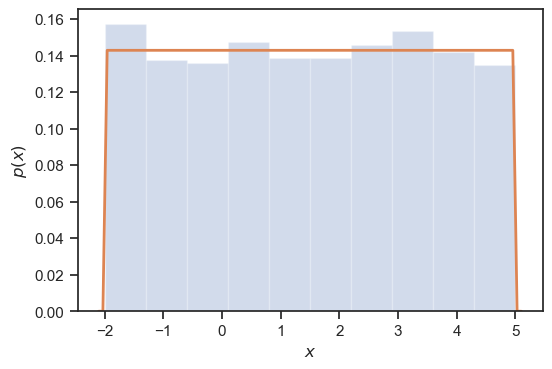

In [17]:
fig, ax = plt.subplots()
ax.hist(x_samples, density=True, alpha=0.25, label="Histogram")
ax.plot(xs, X.pdf(xs), lw=2, label="True PDF")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

## Questions

+ Repeat the code above so that the random variable is $U([1, 10])$.